# 피마 인디언 당뇨병 예측 - 신경망(Neural Network)

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


'pima-indians-diabetes.csv'

### 전처리

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(filename, header=None, skiprows=9)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Null 값 확인
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pima_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

### 학습/테스트 데이터 셋 분리

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    pima_scaled, df.iloc[:,-1].values, stratify=df[8].values,
    test_size=0.2, random_state=2021
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 신경망 모델 정의/설정/학습/평가

In [10]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# 모델 정의
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))    # 은닉층1, 입력과 연결된 층
model.add(Dense(8, activation='relu'))                  # 은닉층2
model.add(Dense(1, activation='sigmoid'))               # 출력층 - 이진분류
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 설정
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     # 이진 분류
    metrics=['accuracy']
)

In [14]:
# 모델 학습
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=2
)

Epoch 1/200
10/10 - 1s - loss: 0.7015 - accuracy: 0.3564 - val_loss: 0.7000 - val_accuracy: 0.3821
Epoch 2/200
10/10 - 0s - loss: 0.6916 - accuracy: 0.5275 - val_loss: 0.6928 - val_accuracy: 0.5285
Epoch 3/200
10/10 - 0s - loss: 0.6839 - accuracy: 0.6741 - val_loss: 0.6857 - val_accuracy: 0.6341
Epoch 4/200
10/10 - 0s - loss: 0.6775 - accuracy: 0.6578 - val_loss: 0.6802 - val_accuracy: 0.6341
Epoch 5/200
10/10 - 0s - loss: 0.6714 - accuracy: 0.6599 - val_loss: 0.6755 - val_accuracy: 0.6260
Epoch 6/200
10/10 - 0s - loss: 0.6658 - accuracy: 0.6619 - val_loss: 0.6712 - val_accuracy: 0.6179
Epoch 7/200
10/10 - 0s - loss: 0.6598 - accuracy: 0.6640 - val_loss: 0.6677 - val_accuracy: 0.6179
Epoch 8/200
10/10 - 0s - loss: 0.6548 - accuracy: 0.6599 - val_loss: 0.6641 - val_accuracy: 0.6179
Epoch 9/200
10/10 - 0s - loss: 0.6498 - accuracy: 0.6578 - val_loss: 0.6606 - val_accuracy: 0.6179
Epoch 10/200
10/10 - 0s - loss: 0.6455 - accuracy: 0.6578 - val_loss: 0.6580 - val_accuracy: 0.6260
Epoch 11/

In [15]:
# 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7792


[0.4581398367881775, 0.7792207598686218]

In [16]:
accuracy = model.evaluate(X_test, y_test)[1]
accuracy

5/5 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7792


0.7792207598686218

### 훈련과정 시각화

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(1, len(y_acc)+1)

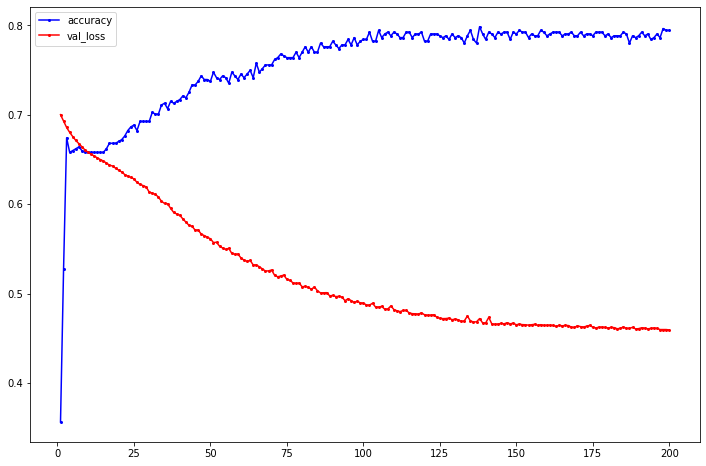

In [20]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', label='accuracy', markersize=2)
plt.plot(x_len, y_vloss, 'ro-', label='val_loss', markersize=2)
plt.legend()
plt.show()

In [21]:
del model

In [22]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))    # 은닉층1, 입력과 연결된 층
model.add(Dense(8, activation='relu'))                  # 은닉층2
model.add(Dense(1, activation='sigmoid'))               # 출력층 - 이진분류
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     # 이진 분류
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=400, batch_size=50, verbose=0
)

In [25]:
accuracy = model.evaluate(X_test, y_test)[1]
accuracy

5/5 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7727


0.7727272510528564

In [26]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(1, len(y_acc)+1)

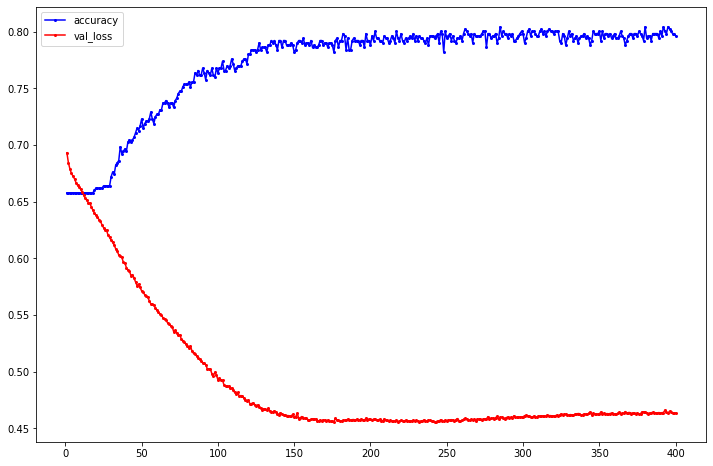

In [27]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', label='accuracy', markersize=2)
plt.plot(x_len, y_vloss, 'ro-', label='val_loss', markersize=2)
plt.legend()
plt.show()